## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
# Display the data table for preview
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
complete_data['Mouse ID'].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = complete_data[complete_data.duplicated(['Mouse ID', 'Timepoint'])]
dup_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_data = complete_data[complete_data['Mouse ID'] != "g989"]

In [5]:
# Checking the number of mice in the clean DataFrame.
complete_data['Mouse ID'].count()

1880

In [6]:
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Using the aggregation method, produce the same summary statistics in a single line
mouse_grp = complete_data.groupby(['Drug Regimen'])
tumor_df = mouse_grp['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_df.columns = ['Tumor Volume Mean', 'Tumor Volume Median', 'Tumor Volume Variance', 'Tumor Volume Standard Deviation', 'Tumor Volume SEM']
tumor_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

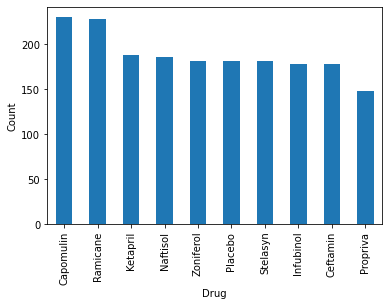

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count = complete_data['Drug Regimen'].value_counts()
count.plot(kind = "bar")
plt.xlabel('Drug')
plt.ylabel('Count')
plt.show()

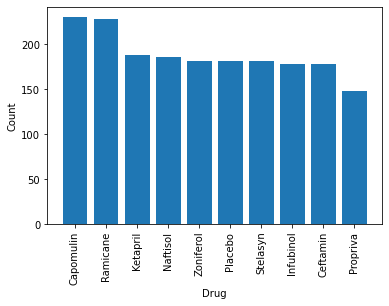

In [9]:
count = complete_data['Drug Regimen'].value_counts()

plt.bar(count.index.values, count.values)
plt.xticks(rotation = 90)
plt.xlabel('Drug')
plt.ylabel('Count')
plt.show()

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_grp = complete_data.groupby(['Sex'])
sex_df= sex_grp.agg({'Mouse ID':"count"})
sex_df.columns = ["Count"]
sex_df['Count'] = sex_df['Count'] / complete_data['Mouse ID'].count() * 100
sex_df

,Count
Sex,
Female,49.042553
Male,50.957447


array([<AxesSubplot:ylabel='Count'>], dtype=object)

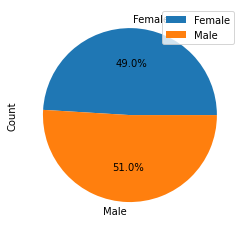

In [11]:
sex_df.plot(kind = "pie", subplots=True, autopct='%1.1f%%')

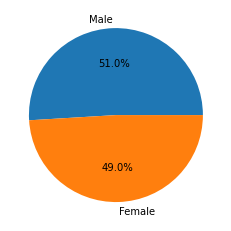

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = complete_data['Sex'].value_counts()
plt.pie(counts.values, labels = counts.index.values, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
tumor_max = complete_data.groupby(['Mouse ID'])['Timepoint'].max()
tumor_max
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(tumor_max,complete_data, on=['Mouse ID','Timepoint'], how = "left")
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in list:
    final_tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == drug, "Tumor Volume (mm3)"]
     # add subset 
    tumor_vol_list.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers - {outliers}")

Capomulin's potential outliers - Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers - Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers - 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers - Series([], Name: Tumor Volume (mm3), dtype: float64)


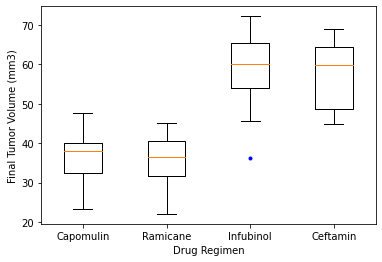

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_list, sym='b.')
plt.xlabel('Drug Regimen')
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']
list = capomulin_df['Mouse ID'].tolist()
print(list)

['b128', 'b742', 'f966', 'g288', 'g316', 'i557', 'i738', 'j119', 'j246', 'l509', 'l897', 'm601', 'm957', 'r157', 'r554', 'r944', 's185', 's710', 't565', 'u364', 'v923', 'w150', 'w914', 'x401', 'y793']


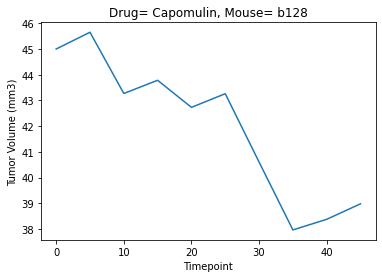

In [17]:
def line_plot(drug_regimen, mouse_id):
    regimen_data = complete_data.loc[complete_data["Drug Regimen"] == drug_regimen]
    data_by_id = regimen_data.loc[regimen_data['Mouse ID'] == mouse_id]
    plt.plot(data_by_id['Timepoint'], data_by_id['Tumor Volume (mm3)'])
    plt.xlabel('Timepoint')
    plt.ylabel('Tumor Volume (mm3)')
    plt.title("Drug= " + drug_regimen + ", Mouse= " + mouse_id)
    plt.show()
    
line_plot("Capomulin", "b128")

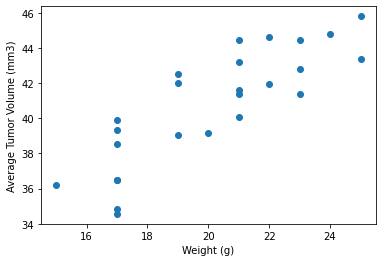

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
def scatter_plot(drug_regimen):
    regimen_data = complete_data.loc[complete_data['Drug Regimen'] == drug_regimen]
    id_grp = regimen_data.groupby(['Mouse ID']).mean()
    plt.scatter(id_grp['Weight (g)'], id_grp['Tumor Volume (mm3)'])
    plt.xlabel('Weight (g)')
    plt.ylabel('Average Tumor Volume (mm3)')
    return(id_grp)
       
capomulin_plot = scatter_plot("Capomulin")

## Correlation and Regression

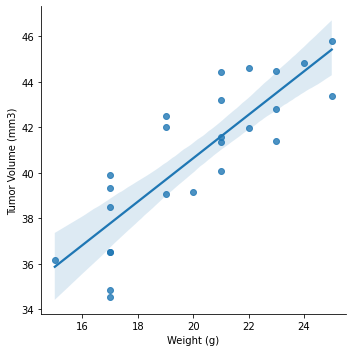

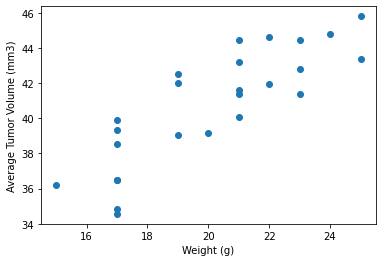

In [19]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
coefficient = sns.lmplot(x='Weight (g)',y='Tumor Volume (mm3)', data=capomulin_plot)
plt.show()
capomulin_plot = scatter_plot("Capomulin")

Three observations:

1. It isn't so surprising that the higher the weight is for a mouse, atleast for Capomulin regimen, the greater the Tumor Volume is for that mouse. 

2. Tumor Volume was much greater for drug regimens Infubinol and Ceftamin compared to Capomulin and Ramicane.

3. As time went on for the mice with the Capomulin regimen, the Tumor Volume decreased in size. This indicated the drug regimen "Capomulin" is effective in treating the tumors.